In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [38]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [85]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4881 - accuracy: 0.8302 - val_loss: 0.5287 - val_accuracy: 0.8273
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4893 - accuracy: 0.8298 - val_loss: 0.5376 - val_accuracy: 0.8243
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4774 - accuracy: 0.8342 - val_loss: 0.5451 - val_accuracy: 0.8282
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4751 - accuracy: 0.8361 - val_loss: 0.5717 - val_accuracy: 0.8299
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4753 - accuracy: 0.8363 - val_loss: 0.5278 - val_accuracy: 0.8255


In [86]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.5724 - accuracy: 0.8171


In [87]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [88]:
predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 73ms/step


In [90]:
import numpy as np

In [91]:
label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

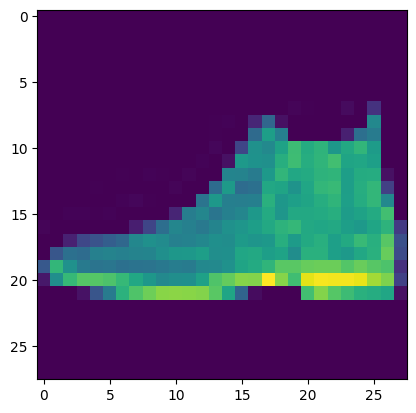

In [93]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show